In [29]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
%matplotlib inline

in_dir = 'D:\\Toppan\\2017-11-20 全データ\\処理済(総量)\\vectorized_keikaku_shibata'
files = [f for f in os.listdir(in_dir)]

# train and test data
train_month_file, test_month_file = '201801010800.xlsx', '201802010800.xlsx'
#train_month_file, test_month_file = '201701010800.xlsx', '201702010800.xlsx'

In [30]:
def pred_energy(energy, train_month_file, test_month_file):

    train_df = pd.read_excel(os.path.join(in_dir, train_month_file), sheet_name=energy)
    test_df = pd.read_excel(os.path.join(in_dir, test_month_file), sheet_name=energy)

    dtr = DecisionTreeRegressor()
    dtr.fit(train_df.values[:, :-1], train_df.values[:, -1])

    pred_dtr = dtr.predict(test_df.values[:, :-1])

    plt.figure(figsize=(20, 8))

    plt.plot(pred_dtr, label='pred')
    plt.plot(test_df.values[:, -1], label='true')
    plt.plot(pred_dtr - test_df.values[:, -1], label='diff')
    
    print('mse: ', mean_squared_error(pred_dtr, test_df.values[:, -1]))
    
    plt.legend()

mse:  0.008504328358208963


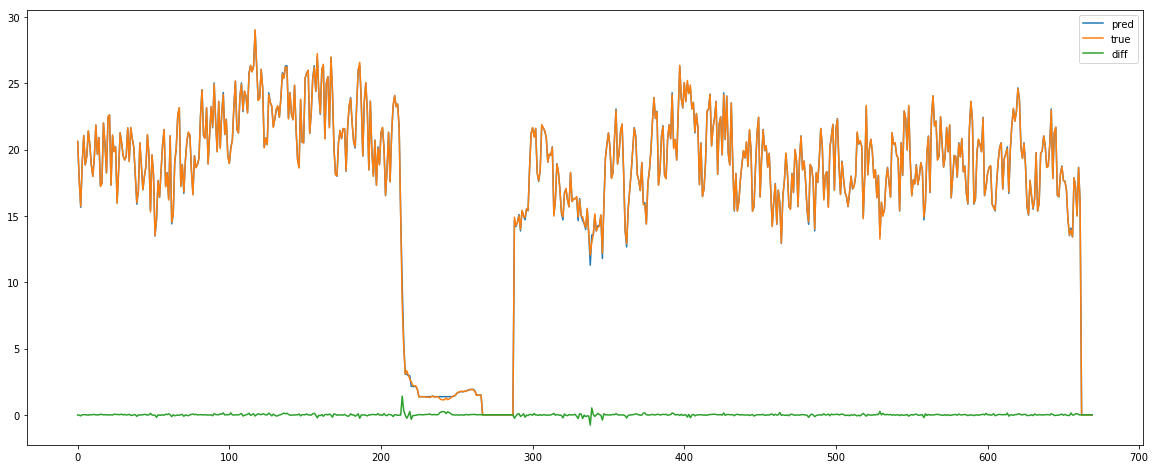

In [31]:
pred_energy('蒸気', train_month_file, test_month_file)

mse:  0.014925373134328358


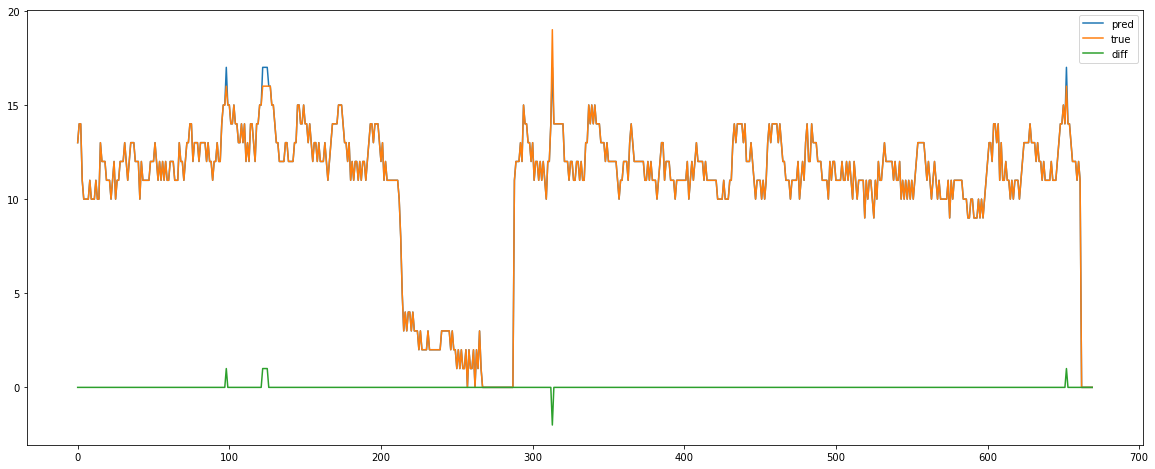

In [32]:
pred_energy('冷水', train_month_file, test_month_file)

mse:  1232.0134328358208


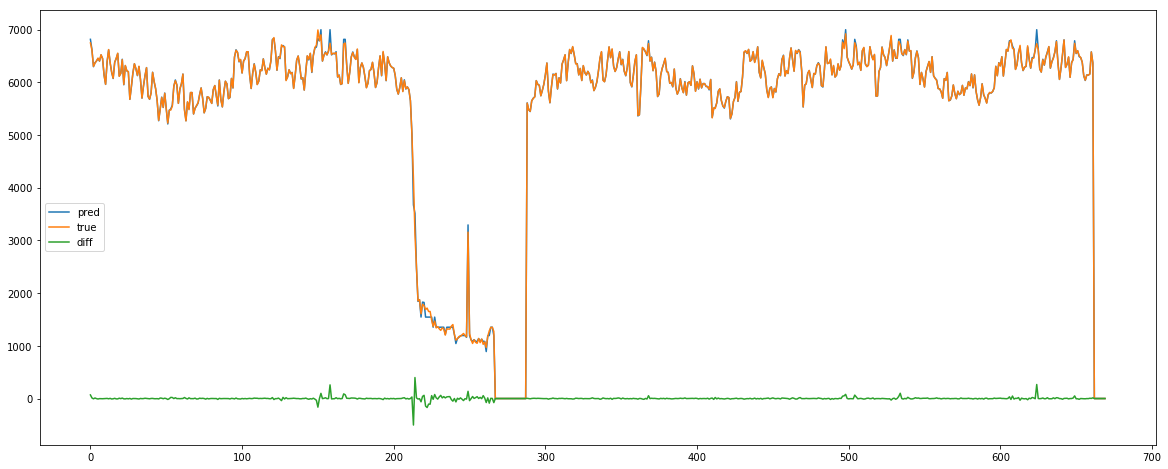

In [33]:
pred_energy('電力', train_month_file, test_month_file)